In [10]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

import torch
import glob
from collections import defaultdict

<IPython.core.display.Javascript object>

In [11]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

import seaborn as sns

sns.set(font_scale=1)
sns.set_style("ticks")

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "14"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [12]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
            data[k].append(d[k])

    return data

<IPython.core.display.Javascript object>

In [13]:
files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*")
exp155 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p01_*")
exp160_p01 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p05_*")
exp160_p05 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p1_*")
exp160_p1 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p2_*")
exp160_p2 = get_data(files, "correct")

<IPython.core.display.Javascript object>

Show example

In [14]:
exp160_p01

defaultdict(list,
            {'correct': [0.7921,
              0.8053,
              0.8025,
              0.8055,
              0.7878,
              0.7893,
              0.8018,
              0.8093,
              0.793,
              0.785,
              0.8064,
              0.8002,
              0.8062,
              0.7942,
              0.794,
              0.8014,
              0.8013,
              0.7961,
              0.8002,
              0.799]})

<IPython.core.display.Javascript object>

Gather data

In [15]:
model_names = ["0.00", "0.01", "0.05", "0.10", "0.20"]
models = [exp155, exp160_p01, exp160_p05, exp160_p1, exp160_p2]

<IPython.core.display.Javascript object>

Est stats

In [16]:
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

<IPython.core.display.Javascript object>

Plot means

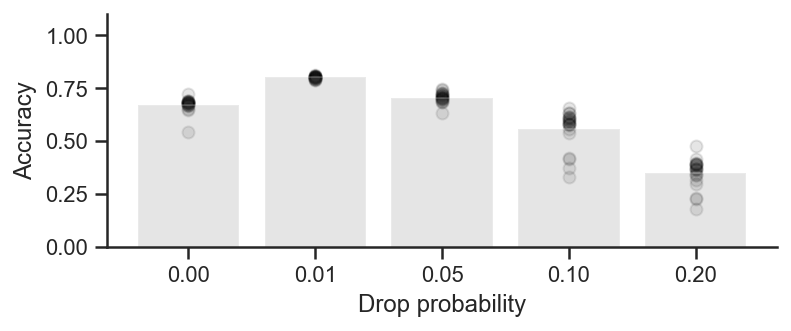

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Drop probability")
_ = sns.despine()

Plot medians

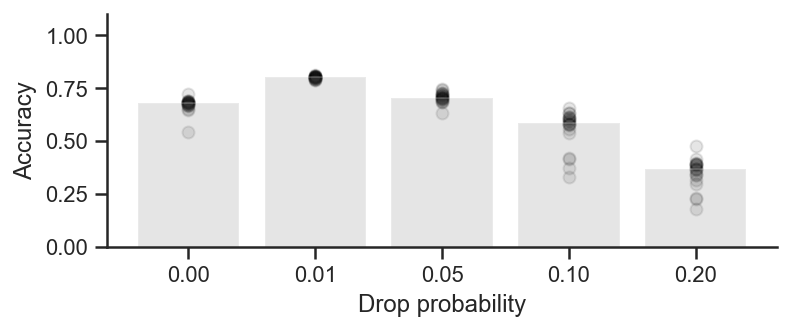

<IPython.core.display.Javascript object>

In [18]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Drop probability")
_ = sns.despine()